# San Francisco Building Permits

## Dataset Context

Source: https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data

A building permit is an official approval document issued by a governmental agency that allows you or your contractor to proceed with a construction or remodeling project on one's property. For more details go to https://www.thespruce.com/what-is-a-building-permit-1398344. Each city or county has its own office related to buildings, that can do multiple functions like issuing permits, inspecting buildings to enforce safety measures, modifying rules to accommodate needs of the growing population etc. For the city of San Francisco, permit issuing is taken care by www.sfdbi.org/

Why is this important: In the recent past, several posts and blogs highlighted that main discrepancy in demand and supply in real estate industry is due to delays in issuing building permits. Refer:
https://www.trulia.com/blog/trends/elasticity-2016/ - Introduces concept of elasticity, and nice scatterplot of various cities. A good data story!
https://biv.com/article/2014/11/city-building-permit-delays-costing-developers-tim

### Take a first look at the data

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings


sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [119]:
df = pd.read_csv('../input/building-permit-applications-data/Building_Permits.csv')
df.head(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [121]:
df.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12


## Handling Missing Values

This table has many empty values. We need to handle them.

In [122]:
missing_values_count = df.isnull().sum()
missing_percentage = 100 * missing_values_count / len(df)

missing_df = pd.DataFrame({'missing_count': missing_values_count, 'missing_percentage': missing_percentage})
missing_df

,missing_count,missing_percentage
Permit Number,0,0.000000
Permit Type,0,0.000000
Permit Type Definition,0,0.000000
Permit Creation Date,0,0.000000
Block,0,0.000000
Lot,0,0.000000
Street Number,0,0.000000
Street Number Suffix,196684,98.885872
Street Name,0,0.000000
Street Suffix,2768,1.391654


In [123]:
total_cell = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cell) * 100
print("Missing percentage: ", percent_missing)

Missing percentage:  26.26002315058403


More than a quarter of the data is missing. Now, we need to look into each column and find out that they are not recorded or not existed.
- Not Existed: Street Number Suffix, Street Suffix, Unit, Unit Suffix, Description, Issued Date, Complete Date, First Construction Document Date, Structural Notification, Number of Existing Stories, Number of Proposed Stories, Voluntary Soft-Story Retrofit, Fire Only Permit, Plansets, TIDF Compliance, Existing Construction Type, Existing Construction Type , Proposed Construction Type, Proposed Construction Type Description, Supervisor District, Neighborhoods - Analysis Boundaries, Zipcode, Location
- Not Recorded: Estimated Cost, Revised Cost, Existing Use, Existing Units, Proposed Use, Proposed Units, Site Permit

All building must have a Location but I put it in the Not Existed because the number of empty Zipcode is the same so I suspect people may leave them empty for good reasons. Similar idea might apply to other columns.

### Try Drop Missing Values: Rows

In [124]:
df.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


It seems that we cannot drop all the rows because there are too many empty values. We will try to drop the columns.

### Try Drop Missing Values: Columns

In [125]:
df_no_empty = df.dropna(axis=1)
df_no_empty.head(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [126]:
drop_columns = df.shape[1] - df_no_empty.shape[1]
print("Drop {} columns".format(drop_columns))

Drop 31 columns


### Try Fill Missing Values

For "Not Existed" values, it makes no sense filling them. We will work on "Not Recorded" values.
For "Not Recorded" values, we will fill them with the most frequent value.

In [127]:
not_recorded_columns = ['Estimated Cost', 'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units', 'Site Permit']
for column in not_recorded_columns:
    df_no_empty[column] = df[column].fillna(df[column].value_counts().idxmax())

In [128]:
df_no_empty.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Site Permit
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945,4000.0,4000.0,tourist hotel/motel,143.0,1 family dwelling,1.0,Y
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718,1.0,500.0,tourist hotel/motel,1.0,1 family dwelling,1.0,Y
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716,20000.0,1.0,retail sales,39.0,retail sales,39.0,Y
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,Y
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992,100000.0,100000.0,retail sales,1.0,1 family dwelling,1.0,Y
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,Indiana,issued,07/06/2017,06/14/2017,1466911170855,4000.0,4000.0,apartments,326.0,apartments,326.0,Y
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,11th,complete,07/12/2017,06/30/2017,1468970403692,12000.0,12000.0,apartments,5.0,apartments,5.0,Y
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,Revere,issued,06/30/2017,06/30/2017,1469035175050,1.0,0.0,1 family dwelling,1.0,1 family dwelling,1.0,Y
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,Fell,issued,07/05/2017,07/05/2017,1469198253772,1.0,1.0,1 family dwelling,1.0,1 family dwelling,1.0,Y
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,Alpine,issued,07/06/2017,07/06/2017,146932394171,1.0,0.0,1 family dwelling,1.0,1 family dwelling,1.0,Y


In [129]:
df_no_empty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Permit Number           198900 non-null  object 
 1   Permit Type             198900 non-null  int64  
 2   Permit Type Definition  198900 non-null  object 
 3   Permit Creation Date    198900 non-null  object 
 4   Block                   198900 non-null  object 
 5   Lot                     198900 non-null  object 
 6   Street Number           198900 non-null  int64  
 7   Street Name             198900 non-null  object 
 8   Current Status          198900 non-null  object 
 9   Current Status Date     198900 non-null  object 
 10  Filed Date              198900 non-null  object 
 11  Record ID               198900 non-null  int64  
 12  Estimated Cost          198900 non-null  float64
 13  Revised Cost            198900 non-null  float64
 14  Existing Use        

In [130]:
print("Number of duplicated rows: ", df_no_empty.duplicated().sum())

Number of duplicated rows:  0


Plot the distribution of the data before and after filling the empty values.

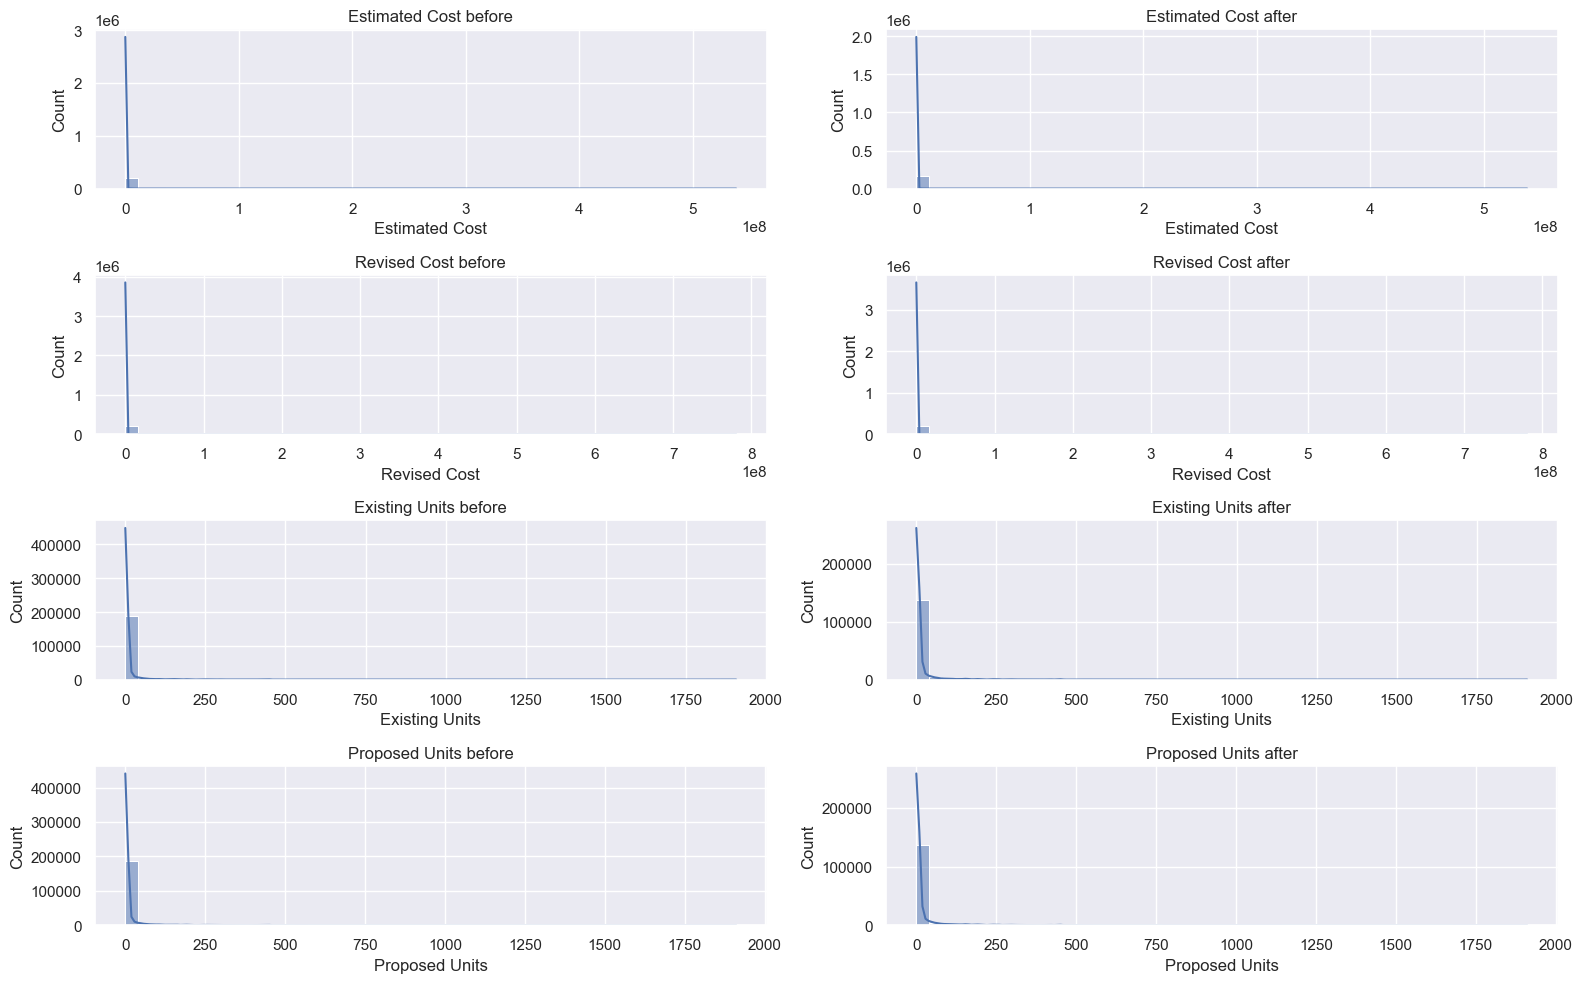

In [131]:
auto_filled_continuous_columns = ['Estimated Cost', 'Revised Cost', 'Existing Units', 'Proposed Units']
fig, axes = plt.subplots(4, 2, figsize=(16, 10))

axes = axes.flatten()

for i, column in enumerate(auto_filled_continuous_columns):
    sns.histplot(data=df_no_empty[column], ax=axes[i * 2], bins=50, kde=True)
    axes[i * 2].set_title(f'{column} before')

    sns.histplot(data=df[column], ax=axes[i * 2 + 1], bins=50, kde=True)
    axes[i * 2 + 1].set_title(f'{column} after')

plt.tight_layout()
plt.show()

Look like our data is very imbalance. All data points go to zero. But based on context of the columns, they shouldn't be like that. How come "Estimate Cost" of a building is so cheap!

We need more external information to explain this.

Let's look at the value counts of the columns to see what else do we have.

In [132]:
for column in auto_filled_continuous_columns:
    display(df_no_empty[column].value_counts())

1.00         55080
10000.00      6695
5000.00       6437
20000.00      5702
15000.00      4779
             ...  
10791.00         1
208561.00        1
10572.00         1
61375.00         1
18453.12         1
Name: Estimated Cost, Length: 11395, dtype: int64

1.000000e+00    53294
0.000000e+00     8513
1.000000e+04     5474
5.000000e+03     5453
2.000000e+04     4696
                ...  
3.472800e+04        1
2.390000e+08        1
1.712600e+04        1
2.034000e+03        1
1.845312e+04        1
Name: Revised Cost, Length: 12629, dtype: int64

1.0      98884
0.0      29134
2.0      21804
3.0       8616
6.0       6066
         ...  
241.0        1
551.0        1
417.0        1
227.0        1
193.0        1
Name: Existing Units, Length: 348, dtype: int64

1.0      97824
0.0      26884
2.0      22891
3.0       9347
6.0       5872
         ...  
159.0        1
319.0        1
289.0        1
543.0        1
401.0        1
Name: Proposed Units, Length: 368, dtype: int64

A large portion of the data is zero and neared values. We may need to consider to treat them as noisy data and drop them all. But we will keep them for now.

## Parsing Date

Date columns are not the date type. This might cause some problems when we do calculations on them. We need to parse them.

First, let's look at the date columns to see if they have a consistent pattern.

In [133]:
date_columns = ['Permit Creation Date', 'Current Status Date', 'Filed Date']
for column in date_columns:
    print(df_no_empty[column].str.len().value_counts())

10    198900
Name: Permit Creation Date, dtype: int64
10    198900
Name: Current Status Date, dtype: int64
10    198900
Name: Filed Date, dtype: int64


The date columns seem to have a consistent pattern. We can parse them.

In [134]:
for column in date_columns:
    df_no_empty[column] = pd.to_datetime(df_no_empty[column], format='%m/%d/%Y')

In [135]:
display(df_no_empty[date_columns].head(5))
display(df_no_empty.info())

,Permit Creation Date,Current Status Date,Filed Date
0,2015-05-06,2017-12-21,2015-05-06
1,2016-04-19,2017-08-03,2016-04-19
2,2016-05-27,2017-09-26,2016-05-27
3,2016-11-07,2017-07-24,2016-11-07
4,2016-11-28,2017-12-01,2016-11-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Permit Number           198900 non-null  object        
 1   Permit Type             198900 non-null  int64         
 2   Permit Type Definition  198900 non-null  object        
 3   Permit Creation Date    198900 non-null  datetime64[ns]
 4   Block                   198900 non-null  object        
 5   Lot                     198900 non-null  object        
 6   Street Number           198900 non-null  int64         
 7   Street Name             198900 non-null  object        
 8   Current Status          198900 non-null  object        
 9   Current Status Date     198900 non-null  datetime64[ns]
 10  Filed Date              198900 non-null  datetime64[ns]
 11  Record ID               198900 non-null  int64         
 12  Estimated Cost          198900

None

## Parsing Object

Some columns have object type but they are actually numbers or strings. Let's take a look on their values again.

In [136]:
df_no_empty.loc[:, df_no_empty.dtypes == object].head(5)

,Permit Number,Permit Type Definition,Block,Lot,Street Name,Current Status,Existing Use,Proposed Use,Site Permit
0,201505065519,sign - erect,0326,023,Ellis,expired,tourist hotel/motel,1 family dwelling,Y
1,201604195146,sign - erect,0306,007,Geary,issued,tourist hotel/motel,1 family dwelling,Y
2,201605278609,additions alterations or repairs,0595,203,Pacific,withdrawn,retail sales,retail sales,Y
3,201611072166,otc alterations permit,0156,011,Pacific,complete,1 family dwelling,1 family dwelling,Y
4,201611283529,demolitions,0342,001,Market,issued,retail sales,1 family dwelling,Y


Now, parsing them to the proper dtype.

In [137]:
number_columns = ['Estimated Cost', 'Revised Cost', 'Existing Units', 'Proposed Units']
for column in number_columns:
    df_no_empty[column] = df_no_empty[column].astype(np.int64)

df_no_empty[number_columns]

,Estimated Cost,Revised Cost,Existing Units,Proposed Units
0,4000,4000,143,1
1,1,500,1,1
2,20000,1,39,39
3,2000,2000,1,1
4,100000,100000,1,1
...,...,...,...,...
198895,1,1,1,1
198896,5000,5000,4,4
198897,1,1,1,1
198898,1,1,1,1


In [138]:
string_columns = ['Permit Number', 'Permit Type Definition', 'Street Name', 'Current Status', 'Existing Use', 'Proposed Use', 'Site Permit', 'Block', 'Lot']
for column in string_columns:
    df_no_empty[column] = df_no_empty[column].astype('string')

df_no_empty[string_columns]

,Permit Number,Permit Type Definition,Street Name,Current Status,Existing Use,Proposed Use,Site Permit,Block,Lot
0,201505065519,sign - erect,Ellis,expired,tourist hotel/motel,1 family dwelling,Y,0326,023
1,201604195146,sign - erect,Geary,issued,tourist hotel/motel,1 family dwelling,Y,0306,007
2,201605278609,additions alterations or repairs,Pacific,withdrawn,retail sales,retail sales,Y,0595,203
3,201611072166,otc alterations permit,Pacific,complete,1 family dwelling,1 family dwelling,Y,0156,011
4,201611283529,demolitions,Market,issued,retail sales,1 family dwelling,Y,0342,001
...,...,...,...,...,...,...,...,...,...
198895,M862628,otc alterations permit,Montgomery,issued,1 family dwelling,1 family dwelling,Y,0113,017A
198896,201712055595,otc alterations permit,Bush,issued,apartments,apartments,Y,0271,014
198897,M863507,otc alterations permit,Indiana,issued,1 family dwelling,1 family dwelling,Y,4318,019
198898,M863747,otc alterations permit,Sutter,issued,1 family dwelling,1 family dwelling,Y,0298,029


Now, all the columns are in the proper dtype. Let's check them.

In [139]:
df_no_empty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Permit Number           198900 non-null  string        
 1   Permit Type             198900 non-null  int64         
 2   Permit Type Definition  198900 non-null  string        
 3   Permit Creation Date    198900 non-null  datetime64[ns]
 4   Block                   198900 non-null  string        
 5   Lot                     198900 non-null  string        
 6   Street Number           198900 non-null  int64         
 7   Street Name             198900 non-null  string        
 8   Current Status          198900 non-null  string        
 9   Current Status Date     198900 non-null  datetime64[ns]
 10  Filed Date              198900 non-null  datetime64[ns]
 11  Record ID               198900 non-null  int64         
 12  Estimated Cost          198900

## Handle Categorical Columns

Beside numeric columns, there are also categorical columns. We need to transform them to number.

In [140]:
df_no_empty[string_columns].head(5)

,Permit Number,Permit Type Definition,Street Name,Current Status,Existing Use,Proposed Use,Site Permit,Block,Lot
0,201505065519,sign - erect,Ellis,expired,tourist hotel/motel,1 family dwelling,Y,0326,023
1,201604195146,sign - erect,Geary,issued,tourist hotel/motel,1 family dwelling,Y,0306,007
2,201605278609,additions alterations or repairs,Pacific,withdrawn,retail sales,retail sales,Y,0595,203
3,201611072166,otc alterations permit,Pacific,complete,1 family dwelling,1 family dwelling,Y,0156,011
4,201611283529,demolitions,Market,issued,retail sales,1 family dwelling,Y,0342,001


In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
label_encoder = LabelEncoder()
categorical_columns = string_columns

for column in categorical_columns:
    df_no_empty[column] = label_encoder.fit_transform(df_no_empty[column])

In [143]:
df_no_empty.head(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Site Permit
0,64721,4,6,2015-05-06,325,351,140,531,5,2017-12-21,2015-05-06,1380611233945,4000,4000,85,143,0,1,0
1,92971,4,6,2016-04-19,304,135,440,642,8,2017-08-03,2016-04-19,1420164406718,1,500,85,1,0,1,0
2,96216,3,0,2016-05-27,516,725,1647,1190,13,2017-09-26,2016-05-27,1424856504716,20000,1,71,39,72,39,0
3,109183,8,5,2016-11-07,148,206,1230,1190,3,2017-07-24,2016-11-07,1443574295566,2000,2000,0,1,0,1,0
4,110493,6,1,2016-11-28,341,1,950,1006,8,2017-12-01,2016-11-28,144548169992,100000,100000,71,1,0,1,0


## Try to Drop Correlated Columns And Redundant Columns

Redundant columns are columns that explain other columns (Permit Type Definition). For example, "Permit Number" and "Record ID" are redundant because they are just the index of the data. We can drop them.

In [144]:
redundant_columns = ['Permit Number', 'Permit Type', 'Record ID']
df_no_empty = df_no_empty.drop(redundant_columns, axis=1)
df_no_empty.head(5)

,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Site Permit
0,6,2015-05-06,325,351,140,531,5,2017-12-21,2015-05-06,4000,4000,85,143,0,1,0
1,6,2016-04-19,304,135,440,642,8,2017-08-03,2016-04-19,1,500,85,1,0,1,0
2,0,2016-05-27,516,725,1647,1190,13,2017-09-26,2016-05-27,20000,1,71,39,72,39,0
3,5,2016-11-07,148,206,1230,1190,3,2017-07-24,2016-11-07,2000,2000,0,1,0,1,0
4,1,2016-11-28,341,1,950,1006,8,2017-12-01,2016-11-28,100000,100000,71,1,0,1,0


In [145]:
print("Drop {}".format(redundant_columns))

Drop ['Permit Number', 'Permit Type', 'Record ID']


Visualize the correlation between columns.

Text(0.5, 1.0, 'Negative Correlations')

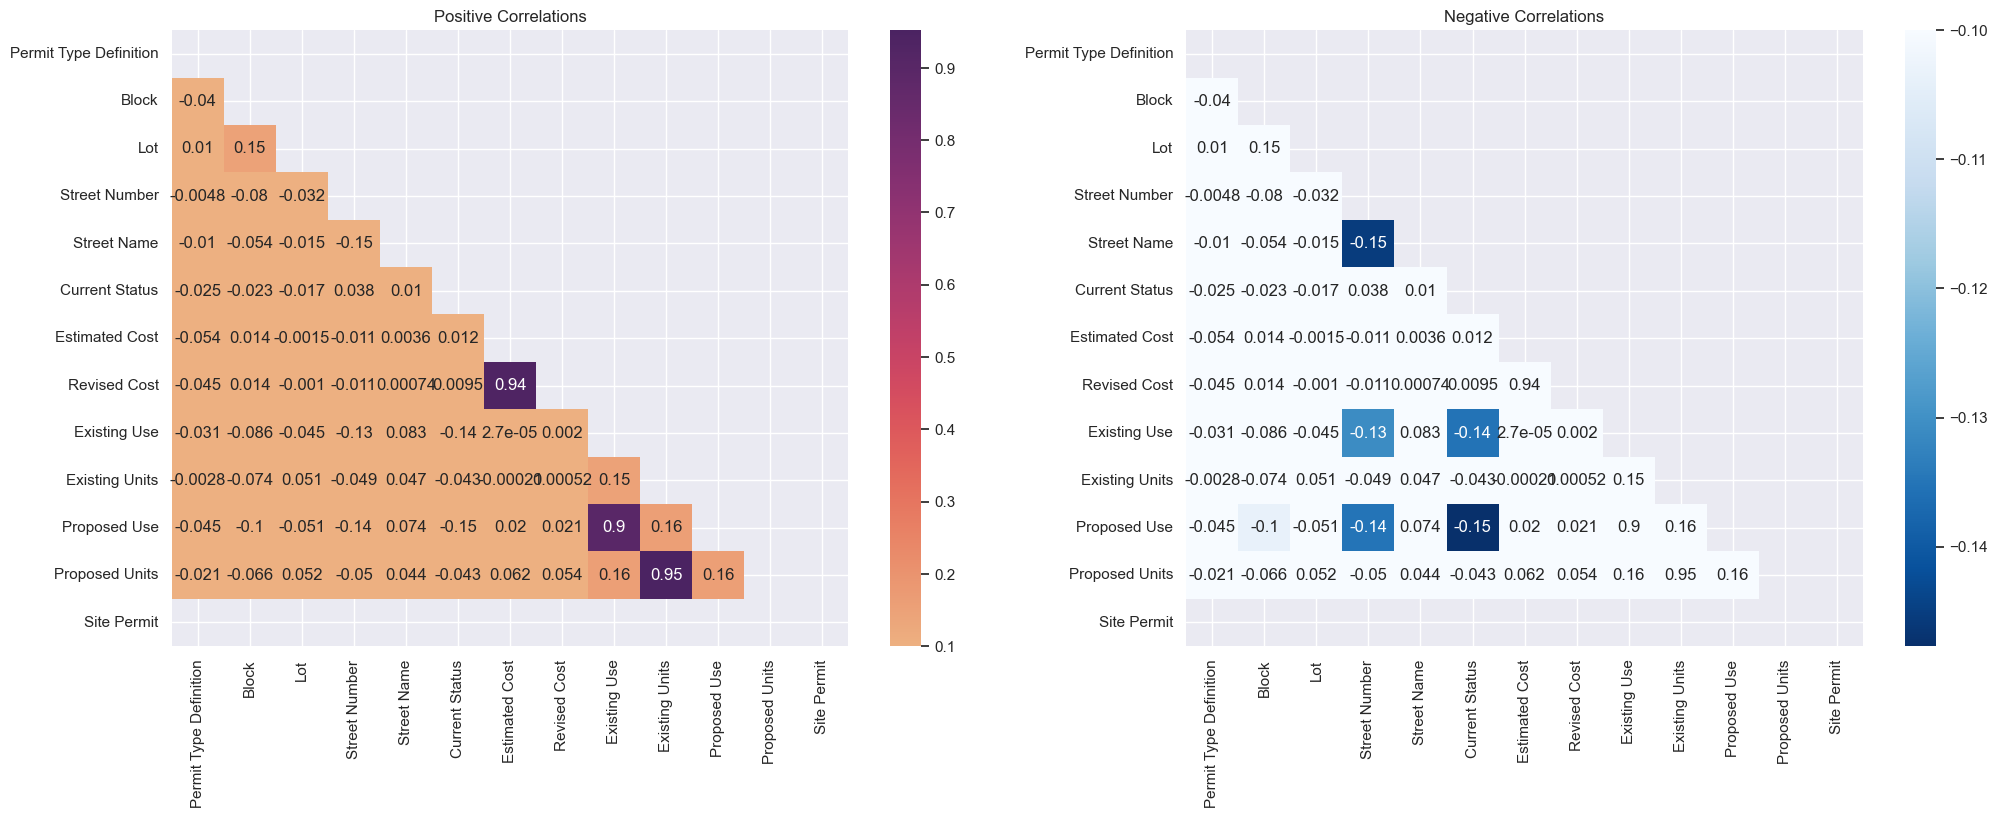

In [146]:
fig, axes = plt.subplots(1,2, figsize=(24,8))

corr = df_no_empty.corr()
mask = np.triu(np.ones_like(corr))

sns.heatmap(data= corr, annot=True, cmap ='flare', ax = axes[0], mask = mask, vmin= 0.1)
axes[0].set_title('Positive Correlations')
sns.heatmap(data= corr, annot=True, cmap ='Blues_r', ax = axes[1], mask = mask, vmax=-0.1)
axes[1].set_title('Negative Correlations')

In [147]:
to_drop_columns = ['Existing Units', 'Existing Use', 'Revised Cost', 'Street Number']
df_no_empty = df_no_empty.drop(to_drop_columns, axis=1)

In [148]:
print("Drop {}".format(to_drop_columns))

Drop ['Existing Units', 'Existing Use', 'Revised Cost', 'Street Number']


## Conclusion

In [149]:
df_no_empty.head(5)

,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Current Status,Current Status Date,Filed Date,Estimated Cost,Proposed Use,Proposed Units,Site Permit
0,6,2015-05-06,325,351,531,5,2017-12-21,2015-05-06,4000,0,1,0
1,6,2016-04-19,304,135,642,8,2017-08-03,2016-04-19,1,0,1,0
2,0,2016-05-27,516,725,1190,13,2017-09-26,2016-05-27,20000,72,39,0
3,5,2016-11-07,148,206,1190,3,2017-07-24,2016-11-07,2000,0,1,0
4,1,2016-11-28,341,1,1006,8,2017-12-01,2016-11-28,100000,0,1,0


### What problems occur in datasets and how to handle them?

- Missing values: Fill them with the most frequent value or drop them
- Inconsistent data types: Parse them to the proper dtype
- Wrong date format: Parse them to datetime
- Noisy data but they are not marked as outliers: Do nothing for now because insufficient information

### Analyze the effects before and after the process

Without processing, there's no way to perform calculations on the later steps. Correlated and redundant columns are dropped to reduce the dimension of the data. This will help the model to train faster and more accurate. The only thing left is the noisy data. We will keep them for now and see what will happen in the next steps.